In [43]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

from pprint import pprint
import time

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat

sys.path.append('..')

from sleeprnn.data.loader import load_dataset
from sleeprnn.common import constants, pkeys
from sleeprnn.data.utils import filter_stamps

In [47]:
params = {pkeys.FS: 256}
mass = load_dataset(constants.MASS_SS_NAME, load_checkpoint=False, params=params)
mass_kc = load_dataset(constants.MASS_KC_NAME, load_checkpoint=False, params=params)

Train size: 11. Test size: 4
Train subjects: 
 [1, 3, 5, 7, 9, 10, 11, 14, 17, 18, 19]
Test subjects: 
 [2, 6, 12, 13]
Dataset mass_ss with 15 patients.
Loading from source.
15 records in mass_ss dataset.
Subject IDs: [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 17, 18, 19]

Loading ID 1
Channel extracted: EEG C3-CLE
N2 pages: 745
Whole-night pages: 1445
Hypnogram pages: 1448
Marks SS from E1: 1044, Marks SS from E2: 2374
Loaded ID 1 (01/15 ready). Time elapsed: 2.3496 [s]

Loading ID 2
Channel extracted: EEG C3-CLE
N2 pages: 911
Whole-night pages: 1748
Hypnogram pages: 1751
Marks SS from E1: 1143, Marks SS from E2: 2185
Loaded ID 2 (02/15 ready). Time elapsed: 5.3381 [s]

Loading ID 3
Channel extracted: EEG C3-CLE
N2 pages: 496
Whole-night pages: 1836
Hypnogram pages: 1839
Marks SS from E1: 143, Marks SS from E2: 594
Loaded ID 3 (03/15 ready). Time elapsed: 8.4752 [s]

Loading ID 5
Channel extracted: EEG C3-CLE
N2 pages: 633
Whole-night pages: 1560
Hypnogram pages: 1563
Marks SS from E1:

In [74]:
page_duration = mass.page_duration
fs = mass.fs
page_size = int(page_duration * fs)

SAVE_DIR = '../resources/datasets/mass_external'
os.makedirs(SAVE_DIR, exist_ok=True)

for subject_id in mass.all_ids:

    filename = os.path.join(SAVE_DIR, 'mass_s%01d_fs_%d' % (subject_id, mass.fs))
    
    n2_pages_from_zero = mass.data[subject_id]['n2_pages'].copy()
    marks_ss_1 = mass.data[subject_id]['marks_1'].copy()
    marks_ss_2 = mass.data[subject_id]['marks_2'].copy()
    signal = mass.data[subject_id]['signal'].copy()
    marks_kc_1 = mass_kc.data[subject_id]['marks_1'].copy()
    
    # Numpy version
    np.savez_compressed(
        filename, 
        signal=signal, 
        marks_ss_1=marks_ss_1,
        marks_ss_2=marks_ss_2,
        marks_kc_1=marks_kc_1,
        n2_pages_from_zero=n2_pages_from_zero
    )
    
    # Matlab version
    savemat(
        filename, 
        {
            'signal': signal, 
            'marks_ss_1': marks_ss_1,
            'marks_ss_2': marks_ss_2,
            'marks_kc_1': marks_kc_1,
            'n2_pages_from_zero': n2_pages_from_zero
        }
    )
    print('Saved S%01d' % subject_id, flush=True)

Saved S1
Saved S2
Saved S3
Saved S5
Saved S6
Saved S7
Saved S9
Saved S10
Saved S11
Saved S12
Saved S13
Saved S14
Saved S17
Saved S18
Saved S19


In [ ]:
n2_pages_from_zero = mass.data[subject_id]['n2_pages'].copy()
    marks_ss_1 = mass.data[subject_id]['marks_1'].copy()
    marks_ss_2 = mass.data[subject_id]['marks_2'].copy()
    signal = mass.data[subject_id]['signal'].copy()
    marks_kc_1 = mass_kc.data[subject_id]['marks_1'].copy()

Showing 804 N2 pages of S19


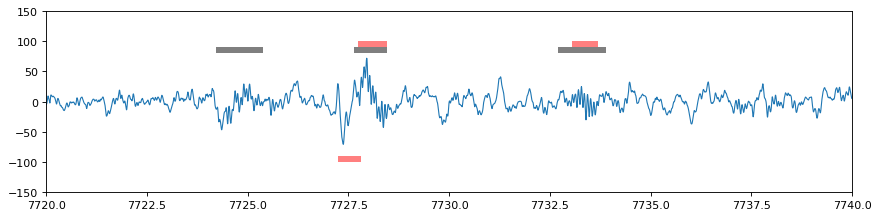

In [80]:
print('Showing %d N2 pages of S%01d' % (len(n2_pages_from_zero), subject_id))

which_page_idx = 250

start_sample = n2_pages_from_zero[which_page_idx] * page_size
end_sample = start_sample + page_size
time_axis = np.arange(start_sample, end_sample) / fs
segment_marks_ss_1 = filter_stamps(marks_ss_1, start_sample, end_sample)
segment_marks_ss_2 = filter_stamps(marks_ss_2, start_sample, end_sample)
segment_marks_kc_1 = filter_stamps(marks_kc_1, start_sample, end_sample)

fig, ax = plt.subplots(1, 1, figsize=(13, 3), dpi=80)
ax.plot(time_axis, signal[start_sample:end_sample], linewidth=1)
for mark in segment_marks_ss_1:
    ax.fill_between(mark/fs, 90, 100, facecolor='r', alpha=0.5)
for mark in segment_marks_ss_2:
    ax.fill_between(mark/fs, 80, 90, facecolor='k', alpha=0.5)
for mark in segment_marks_kc_1:
    ax.fill_between(mark/fs, -100, -90, facecolor='r', alpha=0.5)
ax.set_xlim([start_sample/fs, end_sample/fs])
ax.set_ylim([-150, 150])
plt.show()